In [1]:
#https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_04_3_regression.ipynb

#https://github.com/aa-gamJain/Regression-with-Keras-Deep-Learning-Library-in-Python/blob/master/Regression%20Tutorial%20with%20the%20Keras%20Deep%20Learning%20Library%20in%20Python.ipynb

In [1]:
import pandas as pd

df = pd.read_csv('Combined_Izmir_full.csv')

#https://www.youtube.com/watch?v=2IpFKLohxOI
# shuffle the generated data
#ds = df.sample(frac=1)
df.head(5)

,Floor_Area,Floor_Number,ofPeople_service,ofPeople_living,ofPeople_bedroom,Construction_recorded,schedule_recorded,Window_Count,w_north,w_north-east,...,o_east,o_south-east,o_south,o_south-west,o_west,o_north-west,Cooling,Heating,Lighting,Equipment
0,50.33,5,0.114,0.114,0.057,0,0,4,0,0,...,0,0,0,0,1,1,53.25,37.55,7.56,2.38
1,61.50,3,0.102,0.102,0.051,1,2,3,0,1,...,0,0,0,0,1,1,21.82,23.23,7.02,2.38
2,77.37,2,0.048,0.048,0.024,0,0,4,0,1,...,1,0,0,0,0,0,31.13,30.83,11.55,2.38
3,150.28,4,0.051,0.051,0.026,0,2,5,0,1,...,1,1,1,0,0,1,56.48,62.20,6.83,2.38
4,105.60,1,0.048,0.048,0.024,0,2,3,0,0,...,1,1,0,0,1,1,50.08,23.49,7.05,2.38


In [2]:
# Convert to numpy - Classification
x_columns = df.columns.drop('Cooling').drop('Heating').drop('Lighting').drop('Equipment')
x = df[x_columns].values
y = df['Heating'].values

In [4]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler() 
x = min_max_scaler.fit_transform(x)


#splitting of train and test set
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(x, y, test_size=0.2)

#splitting of test and validaiton set
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1618, 25) (202, 25) (203, 25) (1618,) (202,) (203,)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
# Build the neural network
# The number of epochs is the number of times the model will cycle through the data
model = Sequential()

'''
#model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(100, input_dim=x.shape[1], activation='relu')) # Hidden 
model.add(Dense(50, activation='relu')) # Hidden 2
model.add(Dense(100, activation='relu')) # Hidden 3
model.add(Dense(1)) # Output
'''
model.add(Dense(50, input_dim=x.shape[1], activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

'''
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto', restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=100)
'''

hist = model.fit(X_train,Y_train,validation_data=(X_val,Y_val),batch_size=10,verbose=2,epochs=30)

Train on 1618 samples, validate on 202 samples
Epoch 1/30
1618/1618 - 1s - loss: 475.0087 - accuracy: 0.0000e+00 - mae: 16.7240 - val_loss: 112.5177 - val_accuracy: 0.0000e+00 - val_mae: 8.2511
Epoch 2/30
1618/1618 - 0s - loss: 86.3945 - accuracy: 0.0000e+00 - mae: 6.9847 - val_loss: 88.1670 - val_accuracy: 0.0000e+00 - val_mae: 7.0441
Epoch 3/30
1618/1618 - 0s - loss: 77.5661 - accuracy: 0.0000e+00 - mae: 6.5162 - val_loss: 77.6765 - val_accuracy: 0.0000e+00 - val_mae: 6.6912
Epoch 4/30
1618/1618 - 0s - loss: 70.7436 - accuracy: 0.0000e+00 - mae: 6.2436 - val_loss: 74.3908 - val_accuracy: 0.0000e+00 - val_mae: 6.4513
Epoch 5/30
1618/1618 - 0s - loss: 67.2210 - accuracy: 0.0000e+00 - mae: 6.0260 - val_loss: 71.5071 - val_accuracy: 0.0000e+00 - val_mae: 6.2550
Epoch 6/30
1618/1618 - 0s - loss: 64.6670 - accuracy: 0.0000e+00 - mae: 5.9476 - val_loss: 69.2246 - val_accuracy: 0.0000e+00 - val_mae: 6.3310
Epoch 7/30
1618/1618 - 0s - loss: 63.1832 - accuracy: 0.0000e+00 - mae: 5.8556 - val_l

In [12]:
#model.evaluate(X_test, Y_test)

In [18]:
from sklearn import metrics

# Predict
pred = model.predict(X_test)

# Measure MSE error.  
score = metrics.mean_squared_error(pred,Y_test)
print("Final score (MSE): {}".format(score))

Final score (MSE): 68.11725872945917


In [19]:
import numpy as np

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,Y_test))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 8.253318043639126


In [20]:
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

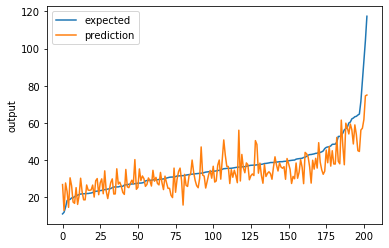

In [21]:
# Plot the chart
chart_regression(pred.flatten(),Y_test)

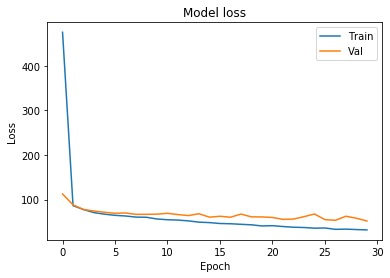

In [22]:
# Visualizing Loss and Accuracy
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

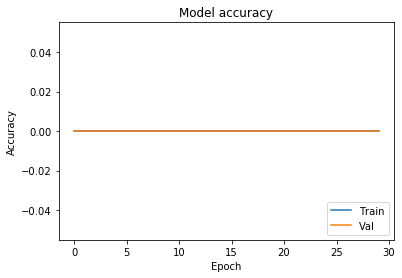

In [24]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()